# Fraud Detection in NYC Real Estate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data
# from pyod.models.knn import KNN   # kNN detector
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [2]:
# read the dataframe
or_mydata = pd.read_csv('NY property data COMPLETE.csv')
or_mydata.shape

no_of_or_data = or_mydata.shape[0]
no_of_or_features = or_mydata.shape[1]
print('No of data points is: ',str(no_of_or_data))
print('No of features is ',str(no_of_or_features))

No of data points is:  1070994
No of features is  33


### 1. Feature Engineering  
Create new features based on the ones in the original dataset

In [2]:
# read the dataframe
mydata = pd.read_csv('45_Variables.csv')
# mydata.shape

no_of_data = mydata.shape[0]
no_of_features = mydata.shape[1]
print('No of data points is: ',str(no_of_data))
print('No of features is ',str(no_of_features))

No of data points is:  1070994
No of features is  46


In [3]:
data_45 = mydata.drop(columns='Unnamed: 0')
data_45.head()

,FULLVAL/LOTAREA_ZIP,FULLVAL/LOTAREA_ZIP3,FULLVAL/LOTAREA_TAXCLASS,FULLVAL/LOTAREA_B,FULLVAL/BLDAREA_ZIP,FULLVAL/BLDAREA_ZIP3,FULLVAL/BLDAREA_TAXCLASS,FULLVAL/BLDAREA_B,FULLVAL/BLDVOL_ZIP,FULLVAL/BLDVOL_ZIP3,...,AVTOT/BLDVOL_B,FULLVAL/LOTAREA_FULL,FULLVAL/BLDAREA_FULL,FULLVAL/BLDVOL_FULL,AVLAND/LOTAREA_FULL,AVLAND/BLDAREA_FULL,AVLAND/BLDVOL_FULL,AVTOT/LOTAREA_FULL,AVTOT/BLDAREA_FULL,AVTOT/BLDVOL_FULL
0,0.126027,0.111252,0.189061,0.114169,21.550545,16.889335,10.073178,17.372130,1.482592,1.272960,...,2.243348,0.118844,15.975230,0.680363,0.750100,38.460033,1.404683,0.607590,51.532666,2.265769
1,124.901681,110.258630,187.372920,113.149280,49.772578,39.007168,23.264749,40.122219,3.424157,2.939996,...,5.181178,117.782864,36.895976,1.571349,278.000212,33.217204,1.213198,602.165157,119.018505,5.232961
2,0.806334,0.711802,1.209632,0.730463,0.564712,0.442570,0.263958,0.455221,0.647500,0.555946,...,0.979748,0.760376,0.418616,0.297138,9.056881,1.901898,1.157723,3.887426,1.350366,0.989540
3,0.276320,0.243925,0.414526,0.250320,1.805425,1.414926,0.843894,1.455373,3.105153,2.666098,...,4.698485,0.260571,1.338346,1.424958,3.241380,6.350277,5.798311,1.332172,4.317217,4.745444
4,2.060754,1.819158,3.091467,1.866851,115.783514,90.740467,54.119649,93.334356,398.272408,341.958441,...,602.636035,1.943300,85.829305,182.767639,27.614313,465.212040,849.551519,9.935128,276.866926,608.659079


In [4]:
npX_train = np.array(data_45.values)
npX_train.shape

(1070994, 45)

### 2. Normalize Dataset
Normalize the dataset as a preprocessing step for dimensionality reduction 

In [5]:
from sklearn import preprocessing
X_norm1 = preprocessing.scale(npX_train)

In [6]:
# verify the features are normalized
npX_train_norm = np.array(X_norm1)
# print('Normalized mean is: ',str(np.mean(npX_train_norm,axis=0)))
print('Normalized mean is: ',str(np.isclose(np.mean(npX_train_norm,axis=0),0)-1))
print('Normalized std is: ',str(np.std(npX_train_norm,axis=0)))

Normalized mean is:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Normalized std is:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
# output the normazized features to dataframe
X_1st_norm_df = pd.DataFrame(npX_train_norm,columns=data_45.columns)
# X_1st_norm_df.to_csv('Normalized_Data_45.csv')
X_1st_norm_df

,FULLVAL/LOTAREA_ZIP,FULLVAL/LOTAREA_ZIP3,FULLVAL/LOTAREA_TAXCLASS,FULLVAL/LOTAREA_B,FULLVAL/BLDAREA_ZIP,FULLVAL/BLDAREA_ZIP3,FULLVAL/BLDAREA_TAXCLASS,FULLVAL/BLDAREA_B,FULLVAL/BLDVOL_ZIP,FULLVAL/BLDVOL_ZIP3,...,AVTOT/BLDVOL_B,FULLVAL/LOTAREA_FULL,FULLVAL/BLDAREA_FULL,FULLVAL/BLDVOL_FULL,AVLAND/LOTAREA_FULL,AVLAND/BLDAREA_FULL,AVLAND/BLDVOL_FULL,AVTOT/LOTAREA_FULL,AVTOT/BLDAREA_FULL,AVTOT/BLDVOL_FULL
0,-0.220109,-0.089338,-0.144911,-0.060594,2.067697,1.062876,0.390187,1.030249,0.041937,0.011543,...,0.012479,-0.040288,0.903973,-0.012896,-0.015426,0.391641,0.003448,-0.032660,0.484033,0.012124
1,31.204520,10.982785,33.304014,7.671353,4.907263,2.542391,0.957482,2.461845,0.210656,0.082040,...,0.041965,5.339548,2.166844,0.023052,17.099048,0.336828,0.001816,50.033935,1.130455,0.040545
2,-0.048775,-0.028970,0.037460,-0.018437,-0.043797,-0.037288,-0.031653,-0.034281,-0.030632,-0.018778,...,-0.000203,-0.010956,-0.035095,-0.028358,0.497346,0.009429,0.001344,0.240315,0.003356,-0.000100
3,-0.182258,-0.076001,-0.104622,-0.051280,0.081038,0.027755,-0.006713,0.028655,0.182935,0.070457,...,0.037120,-0.033808,0.020424,0.017145,0.138359,0.055937,0.040882,0.027646,0.031774,0.035875
4,0.267150,0.082343,0.373736,0.059295,11.548968,6.002955,2.284379,5.810326,34.522383,14.418654,...,6.038340,0.043130,5.120681,7.333598,1.642885,4.853293,7.229703,0.743655,2.642426,5.820370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070989,-0.204960,-0.054658,-0.131462,-0.037194,-0.067251,-0.002491,-0.008823,-0.002343,-0.061705,-0.011995,...,-0.006506,-0.037643,-0.006163,-0.009489,-0.050159,-0.006656,-0.006259,-0.074332,-0.006296,-0.006692
1070990,-0.222187,-0.071508,-0.148816,-0.048660,-0.061767,0.008095,-0.003204,0.007616,-0.057564,-0.007016,...,-0.007918,-0.040612,0.002747,-0.004416,-0.057958,-0.008176,-0.007163,-0.080328,-0.007609,-0.007846
1070991,-0.226279,-0.075510,-0.152938,-0.051384,-0.063481,0.004787,-0.004960,0.004503,-0.051848,-0.000143,...,-0.005621,-0.041317,-0.000037,0.002585,-0.055871,-0.006530,-0.005599,-0.078867,-0.006294,-0.005968
1070992,-0.192667,-0.042634,-0.119079,-0.029012,-0.052605,0.025779,0.006181,0.024251,-0.041583,0.012200,...,-0.004976,-0.035526,0.017630,0.015157,-0.051690,-0.006697,-0.005724,-0.074282,-0.005815,-0.005441


### 3. PCA dimension reduction

In [8]:
# this is for all PC's
from sklearn.decomposition import PCA
skt_all_pca_mod = PCA()
skt_all_pca_mod.fit_transform(X=npX_train_norm, y=None)

array([[ 1.48027377e+00, -9.83675451e-01, -4.48044928e-02, ...,
         7.93374541e-03, -9.13088309e-03,  2.50234257e-02],
       [ 2.63401996e+01,  5.77771019e+01,  1.64094148e+01, ...,
        -2.39037209e-02,  1.42156194e-02, -4.01806990e-02],
       [ 8.76941240e-02,  2.83781759e-01, -6.19459039e-02, ...,
         3.87401536e-04,  3.32878694e-05, -2.63038322e-04],
       ...,
       [-1.69389181e-01, -2.76822823e-01, -6.83742732e-02, ...,
         1.66484394e-04,  9.18815094e-05,  1.62544701e-05],
       [-1.25363202e-01, -2.28012826e-01, -4.07846881e-02, ...,
         2.47088632e-04,  1.21895127e-04, -3.01498383e-05],
       [-1.15047539e-01, -1.45148934e-01, -2.81910652e-02, ...,
         1.43323163e-04,  9.20301118e-05, -3.87163619e-06]])

[2.37225461e+01 8.24597629e+00 3.70339908e+00 2.57895260e+00
 1.99774111e+00 1.62923907e+00 1.10447222e+00 7.46890879e-01
 2.67578840e-01 2.13390636e-01 1.50973942e-01 1.40090013e-01
 8.46317133e-02 7.35385845e-02 6.16854669e-02 5.40612909e-02
 4.52074834e-02 3.68129375e-02 2.38540471e-02 2.15472152e-02
 1.60928020e-02 1.43593705e-02 1.16679567e-02 9.98603211e-03
 9.29931404e-03 7.24548328e-03 5.93816885e-03 5.14184446e-03
 4.44342761e-03 3.00832302e-03 2.89125725e-03 1.79798841e-03
 1.64450847e-03 1.34267257e-03 8.76374149e-04 5.56254363e-04
 3.26484601e-04 2.59780307e-04 1.74972049e-04 1.51626875e-04
 9.32980690e-05 5.50485617e-05 4.92708676e-05 3.83005215e-05
 1.19714351e-05]


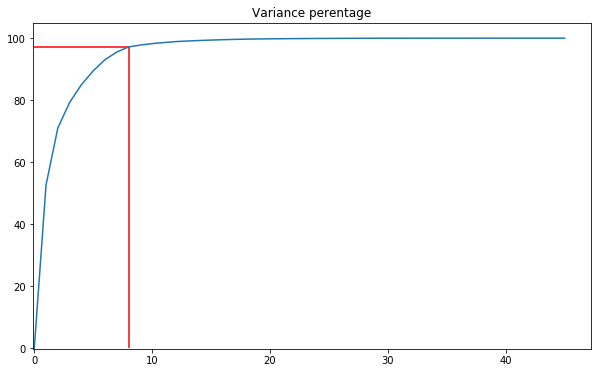

In [17]:
# The amount of variance explained by each of the selected components.
PCA_all_vecs = skt_all_pca_mod.explained_variance_ratio_
plot_pca_vecs = 8
print(skt_all_pca_mod.explained_variance_)
pca_plot_arr = np.zeros(len(PCA_all_vecs) + 1)
pca_plot_arr[1:] = np.cumsum(PCA_all_vecs)
#  = plt.subplots(1,1)
plt.figure(figsize=(10,6))

plt.plot(pca_plot_arr*100)
plt.title('Variance perentage')
# plt.axvline(x=8,c='r')
plt.vlines(x=plot_pca_vecs, ymin=0, ymax=pca_plot_arr[8]*100,color = 'r')
plt.hlines(y = pca_plot_arr[plot_pca_vecs]*100,xmin=0, xmax=plot_pca_vecs, color = 'r' )
plt.xlim(-0.1,)
plt.ylim(-0.1,)

# fig, ax = plt.subplots(1,1)
# p=ax.plot(x,y)
# ax.set_yticks(pca_plot_arr[plot_pca_vecs]*100)
# ax.set_yticklabels(pca_plot_arr[plot_pca_vecs]*100)

plt.show()

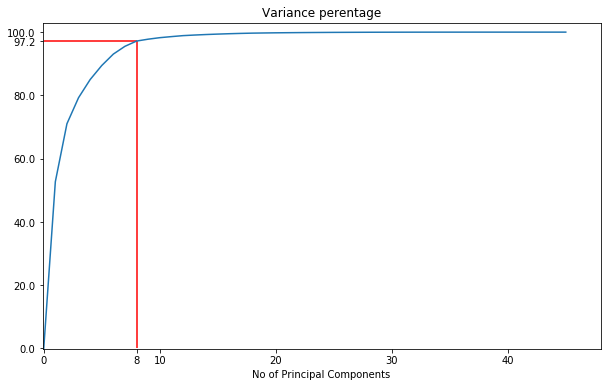

In [9]:
# The amount of variance explained by each of the selected components.
PCA_all_vecs = skt_all_pca_mod.explained_variance_ratio_
plot_pca_vecs = 8
pca_plot_arr = np.zeros(len(PCA_all_vecs) + 1)
pca_plot_arr[1:] = np.cumsum(PCA_all_vecs)
fig, ax = plt.subplots(1,1,figsize = (10,6))
p=plt.plot(pca_plot_arr*100)
plt.title('Variance perentage')
# plt.axvline(x=8,c='r')
plt.vlines(x=plot_pca_vecs, ymin=0, ymax=pca_plot_arr[8]*100,color = 'r')
plt.hlines(y = pca_plot_arr[plot_pca_vecs]*100,xmin=0, xmax=plot_pca_vecs, color = 'r' )
plt.xlim(-0.1,)
plt.ylim(-0.1,)

xt = ax.get_xticks() 
xt=np.append(xt,plot_pca_vecs)
ax.set_xticks(xt)

yt = ax.get_yticks() 
yt=np.append(yt,[pca_plot_arr[plot_pca_vecs]*100])
ax.set_yticks(yt)
# ax.set_yticklabels(100*pca_plot_arr[plot_pca_vecs])
plt.ylim([-0.1,103])
plt.xlim([-0.1,48])
plt.xlabel('No of Principal Components')
# plt.savefig('Figs/1_Var_vs_PC.png',dpi = 200)
plt.show()

In [12]:
# returns number of principal components until variance ratio is var_per (0.95)
var_per = 0.95
np.where(PCA_all_vecs.cumsum()>var_per)[0][0]

6

In [226]:
pca_plot_arr[plot_pca_vecs]*100

97.17594774388311

In [13]:
n_pca_comp = 8
skt_pca_mod = PCA(n_components=n_pca_comp)
# skt_pca_mod = PCA()
start_time = pd.datetime.now()
X_PCA_train = skt_pca_mod.fit_transform(X=npX_train_norm, y=None)
print('duration: ', pd.datetime.now() - start_time)

duration:  0:00:02.960314


In [14]:
# verify the dimensions of the reduced dimensions dataset
print('Dims of PCA set are',str(X_PCA_train.shape))

Dims of PCA set are (1070994, 8)


In [15]:
# The amount of variance explained by each of the selected components.
PCA_vecs_skt = skt_pca_mod.explained_variance_
PCA_vecs_skt

array([23.72254606,  8.24597629,  3.70339908,  2.5789526 ,  1.99774111,
        1.62923907,  1.10447222,  0.74689088])

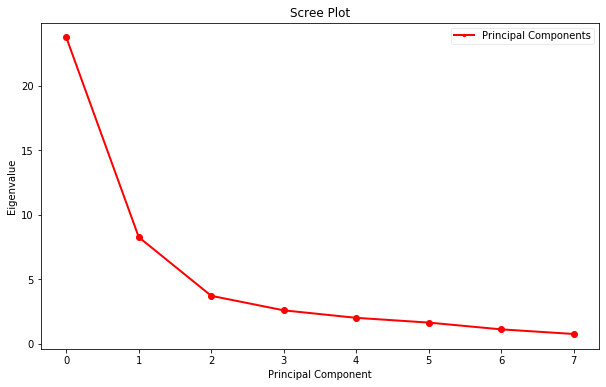

In [16]:
# plot the scree plot
fig = plt.figure(figsize=(10,6))
# sing_vals = np.arange(num_vars) + 1
plt.plot(np.arange(0,len(PCA_vecs_skt)), PCA_vecs_skt, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Principal Components'], loc='best', borderpad=0.3, 
                 shadow=False,
                 markerscale=0.4)
# plt.savefig('Figs/2_Scree_vs_PC.png',dpi = 200)
leg.get_frame().set_alpha(0.4)
plt.show()

### 4. Normalize the reduced dimension dataset  
We normalize the output dataset from the PCA to use as input in the autoencoder.

In [15]:
X_pca_norm2 = preprocessing.scale(X_PCA_train)
# verify the normalizations
print('Normalized mean is: ',str(np.isclose(np.mean(X_pca_norm2,axis=0),0)-1))
print('Normalized std is: ',str(np.std(X_pca_norm2,axis=0)))

Normalized mean is:  [0 0 0 0 0 0 0 0]
Normalized std is:  [1. 1. 1. 1. 1. 1. 1. 1.]


### 5. Score 1
The 1st fraud score is the distance of each record of the normalized PCA dataset from the origin. 

In [17]:
# aka take the lp-norm of each data point 
from scipy.linalg import norm
# 2 for euclidean, 1 for manhattan, np.inf for infty norm (max) etc
# p = np.inf 
# p = 1
p = 2
Scores_1 = norm(X_pca_norm2,ord = p,axis=1) # row-wise norm of X_pca_norm2

### S1 histogram

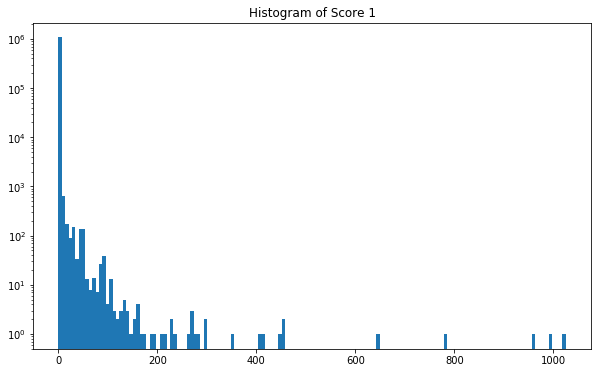

In [19]:
# #normal histogram of S1
plt.figure(figsize=(10,6))
plt.hist(Scores_1, bins=150)  
# plt.plot(Scores_1)
# plt.hist(Scores_1, bins=15)  
titl_str = 'Histogram for Score 1 L-'+str(p)+' norm w/ PCA with '+str(n_pca_comp)+' PCs'
# plt.title(titl_str)
plt.title('Histogram of Score 1')
plt.yscale('log')
plt.show()

### 6. Score 2  
We  train an autoencoder on the PCA dataset. The autoencoder is written in Keras. 

In [20]:
from keras.layers import Input, Dense
from keras.models import Model
# this is the size of our encoded representations
encoding_dim = 5 # number of hidden layer nodes

# this is our input placeholder
input_mat = Input(shape=(X_PCA_train.shape[1],))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_mat)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(X_PCA_train.shape[1], activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_mat, decoded)

Using TensorFlow backend.


In [40]:
# load autoencoder and encoder models
# don't know how to make this work
# from keras.models import load_model
# encoder = load_model('autoencoder_5_nodes.h5')
# autoencoder = load_model('encoder_5_nodes.h5')

/home/thanos/miniconda3/envs/dev/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [21]:
# Let's also create a separate encoder model:

# this model maps an input to its encoded representation
encoder = Model(input_mat, encoded)
# As well as the decoder model:

# create a placeholder for an encoded (5-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [22]:
# fit the model
no_of_epochs = 5
start_time = pd.datetime.now()
history = autoencoder.fit(x=X_PCA_train, y=X_PCA_train, batch_size = None, epochs = no_of_epochs, validation_split = 0)
print('duration: ', pd.datetime.now() - start_time)

Epoch 1/5
1070994/1070994 [==============================] - 33s 31us/step - loss: 5.4173
Epoch 2/5
1070994/1070994 [==============================] - 32s 30us/step - loss: 5.4081
Epoch 3/5
1070994/1070994 [==============================] - 32s 30us/step - loss: 5.4075
Epoch 4/5
1070994/1070994 [==============================] - 32s 30us/step - loss: 5.4078
Epoch 5/5
1070994/1070994 [==============================] - 32s 30us/step - loss: 5.4077
duration:  0:02:41.322746


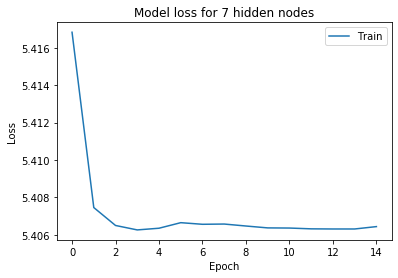

In [56]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss for '+str(encoding_dim)+' hidden nodes')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.legend(['Train'], loc='upper right')
plt.show()

#### Loss function per epoch on an autoencoder with 7 nodes in the middle layer

In [57]:
# save the model loss in dataframe
temp_df = pd.DataFrame.from_dict(history.history)
temp_df.columns = [str(encoding_dim)+' nodes']
# df_k_loss = df_k_loss.append(),ignore_index=False)
temp_df

,7 nodes
0,5.416830
1,5.407450
2,5.406492
3,5.406254
4,5.406344
5,5.406641
6,5.406555
7,5.406568
8,5.406463
9,5.406362


#### Loss function per epoch on an autoencoder with 3,4,5 & 7 nodes in the middle layer

In [58]:
# combine the dataframes with loss history
# df_k_loss2 = pd.concat([df_k_loss2, temp_df], axis=1, sort=False)
# df_k_loss2

,3 nodes,4 nodes,5 nodes,7 nodes
0,5.422779,5.424373,5.416325,5.416830
1,5.415954,5.414416,5.410127,5.407450
2,5.414820,5.414106,5.409283,5.406492
3,5.414163,5.414054,5.409096,5.406254
4,5.414044,5.414018,5.409030,5.406344
5,5.414004,5.413970,5.408993,5.406641
6,5.413978,5.413950,5.408955,5.406555
7,5.413959,5.413936,5.408985,5.406568
8,5.413996,5.413939,5.408976,5.406463
9,5.413971,5.413934,5.408957,5.406362


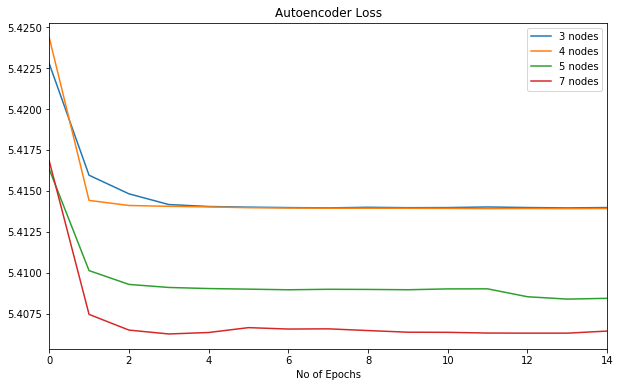

In [14]:
# df_k_loss2.to_csv('45_DS_losses.csv')
df_k_loss2 = pd.read_csv('45_DS_losses.csv')
df_k_loss2 = df_k_loss2.drop(columns = 'Unnamed: 0')
df_k_loss2
# plt.figure(figsize=(10,6))
df_k_loss2.plot(figsize=(10,6))
plt.title('Autoencoder Loss')
plt.xlabel('No of Epochs')
plt.savefig('Figs/4_Auto_enc_loss.png',dpi = 200)

#### Get the autoencoder output (decoder layer output)

In [23]:
# get autoencoder output (decoder layer output)
start_time = pd.datetime.now()
encoded_out = encoder.predict(X_PCA_train)
decoded_out = decoder.predict(encoded_out)
print('duration: ', pd.datetime.now() - start_time)

duration:  0:00:11.513360


In [24]:
print('Output layer shape is:',str(decoded_out.shape))

Output layer shape is: (1070994, 8)


### 6. Score 2  
(b) The autoencoder fraud score is any measure of difference between the original input record and the autoencoder output record

In [25]:
# define the difference between input-output:
auto_enc_diff = X_PCA_train - decoded_out # input- output

In [26]:
# 2 for euclidean, 1 for manhattan, np.inf for infty norm (max) etc
# p = np.inf 
# p = 1
# p = 2
Scores_2 = norm(auto_enc_diff,ord = p,axis=1) # row-wise norm of X_pca_norm2
print('Using ',str(p),'-norm')

Using  2 -norm


In [68]:
Scores_2.shape

(1070994,)

In [28]:
saved_scores = pd.DataFrame({'Score 1': Scores_1, 'Score 2': Scores_2})
# saved_scores.to_csv('Scores/Scores_1_2.csv')
saved_scores.head()

,Score 1,Score 2
0,1.943136,2.223851
1,27.296348,66.760675
2,0.247036,0.249262
3,0.185182,0.349862
4,26.047596,48.389204


In [ ]:
# histogram takes too long to run
# bins_2 = plot_2_hists(input_array=Scores_2,bin_num=10, norm_p=p, pca_no = n_pca_comp,score_no=2)

### 7. Combine $S_1$ and $S_2$

#### Method 1 to combine scores: use the maximum of Score 1, Score 2 : $S_{F_1} = max\{S_1,S_2\}$

In [29]:
# define the combined score
Score_F = np.mean([Scores_1,Scores_2],axis= 0)
Score_F.shape

(1070994,)

In [ ]:
# f_bins = plot_2_hists(input_array=Score_F,bin_num=10, norm_p=p, pca_no = n_pca_comp,score_no='f')

In [30]:
# plt.plot(f_bins)
# plt.plot(bins_1)
# plt.plot(bins_2)
# plt.legend()
# plt.show()

In [30]:
# define a dataframe with the scores
Scores_df = pd.DataFrame({'Score 1': Scores_1, 'Score 2': Scores_2,'F1. Score': Score_F})
Scores_df.head()

,Score 1,Score 2,F1. Score
0,1.943136,2.223851,2.083494
1,27.296348,66.760675,47.028512
2,0.247036,0.249262,0.248149
3,0.185182,0.349862,0.267522
4,26.047596,48.389204,37.218400


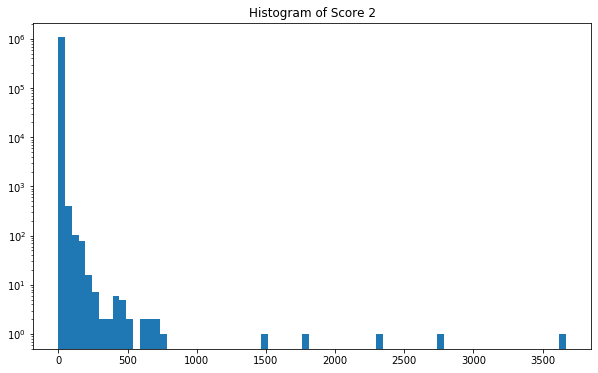

In [34]:
# #normal histogram of S1\2
plt.figure(figsize=(10,6))
plt.hist(Scores_2, bins=75)  
# plt.plot(Scores_1)
# plt.hist(Scores_1, bins=15)  
titl_str = 'Histogram for Score 1 L-'+str(p)+' norm w/ PCA with '+str(n_pca_comp)+' PCs'
# plt.title(titl_str)
plt.title('Histogram of Score 2')
plt.yscale('log')
# plt.savefig('Figs/5_Hist_S2.png',dpi = 200)
plt.show()

[]

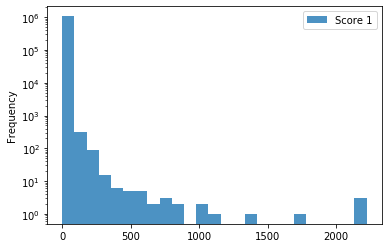

In [80]:
Scores_df[['Score 1']].plot.hist(bins=25, alpha=0.8)
plt.semilogy() #definetely need log scale

[]

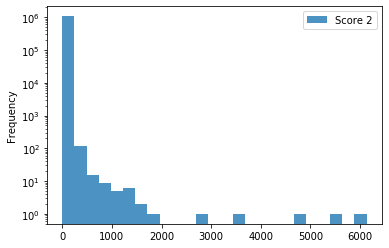

In [81]:
Scores_df[['Score 2']].plot.hist(bins=25, alpha=0.8)

plt.semilogy() #definetely need log scale

In [144]:
# quantile binning 
quant_no_S1, quant_S1_bins = pd.qcut(Scores_df['Score 1'], 20,retbins=True)
quant_no_S1
# quant_S1_bins

0          (0.979, 2222.01]
1          (0.979, 2222.01]
2            (0.457, 0.582]
3            (0.457, 0.582]
4          (0.979, 2222.01]
                 ...       
1070989       (0.32, 0.364]
1070990      (0.364, 0.403]
1070991      (0.364, 0.403]
1070992       (0.32, 0.364]
1070993       (0.26, 0.286]
Name: Score 1, Length: 1070994, dtype: category
Categories (20, interval[float64]): [(0.033299999999999996, 0.115] < (0.115, 0.136] < (0.136, 0.153] < (0.153, 0.168] ... (0.443, 0.457] < (0.457, 0.582] < (0.582, 0.979] < (0.979, 2222.01]]

In [160]:
Scores_df.sort_values('Score 1')

,Score 1,Score 2,F1. Score
1053237,0.034299,0.109035,0.109035
1043972,0.035614,0.110784,0.110784
1043975,0.035673,0.111510,0.111510
1039547,0.035783,0.112608,0.112608
1039546,0.035783,0.112608,0.112608
...,...,...,...
565397,1355.859880,2829.537831,2829.537831
1067359,1750.441774,3572.760916,3572.760916
917941,2147.623007,4791.697885,4791.697885
565391,2206.991321,6130.698251,6130.698251


In [46]:
# Ordered_Scores_df = pd.DataFrame({'Rkd Score 1' : []})
Ordered_Scores_df = Scores_df[['Score 1']].sort_values('Score 1').rank()
Ordered_Scores_df.columns = ['Rkd Score 1']
Ordered_Scores_df['Rkd Score 2'] = Scores_df[['Score 2']].sort_values('Score 2').rank()
# Ordered_Scores_df.tail(20) # max 20 values

#### Method 2 to combine scores: use the  harmonic mean of Score 1, Score 2 : $H_m(S_{N1},S_{N2}) = 2\frac{S_{N1}S_{N2}}{S_{N1}+S_{N2}}$  
If both $S_{N1},S_{N2}$ are large $H_m(S_{N1},S_{N2})$ is also large.

In [53]:
from scipy import stats

hmean_score_order = stats.hmean(np.abs(Ordered_Scores_df.values), axis = 1)
Hmean_scr_df_order = pd.DataFrame(hmean_score_order,columns=(['Ord Harm. Mean']))
Ordered_Scores_df['Ord Harm. Mean'] = Hmean_scr_df_order

indx_harm_mean = Ordered_Scores_df.tail(10).sort_values('Ord Harm. Mean').index
Ordered_Scores_df.tail(10).sort_values('Ord Harm. Mean')
print(indx_harm_mean)

Int64Index([585438, 248664, 565391, 750815, 556608, 917941, 1067359, 632815,
            565397, 585117],
           dtype='int64')


In [201]:
comp_no = 20 # compare the max comp_no elements of Score 1 with Score 2
# compare columns Rkd Score 1 with Rkd Score 2
# Ordered_Scores_df['Rkd Score 2'].tail(comp_no).isin(Ordered_Scores_df['Rkd Score 1'].tail(comp_no)).sum()
no_of_common_elements = Ordered_Scores_df['Rkd Score 1'].tail(comp_no).isin(Ordered_Scores_df['Rkd Score 2'].tail(comp_no)).sum()
print('No of differences in max',str(comp_no),'elements in S1 & S2:',str(comp_no - no_of_common_elements))

No of differences in max 20 elements in S1 & S2: 2


In [54]:
Ordered_Scores_df.tail(10).sort_values('Ord Harm. Mean')

,Rkd Score 1,Rkd Score 2,Ord Harm. Mean
585438,1070989.0,1070987.0,103149.663474
248664,1070987.0,1070985.0,186796.420500
565391,1070992.0,1070994.0,211807.089132
750815,1070986.0,1070983.0,300847.744968
556608,1070985.0,1070984.0,352613.277309
917941,1070993.0,1070992.0,361551.155576
1067359,1070991.0,1070991.0,439227.876649
632815,1070994.0,1070993.0,463259.757168
565397,1070990.0,1070990.0,513412.558457
585117,1070988.0,1070989.0,641526.441134


In [52]:
# get the max scores based on Final 1 score
no_max_outlier = 10
Scores_df.nlargest(n= no_max_outlier, columns='F1. Score')

,Score 1,Score 2,F1. Score
565391,961.172323,3667.411127,2314.291725
632815,1024.715256,2786.823337,1905.769297
917941,993.183712,2319.966934,1656.575323
1067359,781.715697,1762.724790,1272.220244
565397,642.981784,1514.781114,1078.881449
585117,456.661563,739.117369,597.889466
585438,456.973945,687.535899,572.254922
248664,449.983153,649.753907,549.868530
556608,408.498685,627.846797,518.172741
750815,411.698256,612.750205,512.224231


In [62]:
hmean_score_S12 = stats.hmean(np.abs(Scores_df.values), axis = 1)
Scores_df['Score Harm. Mean'] = hmean_score_S12
# Scores_df.nlargest(n= no_max_outlier, columns='Score 1')
Scores_df = Scores_df.rename(columns={'F1. Score': 'Score Mean'})
Scores_df

,Score 1,Score 2,Score Mean,Score Harm. Mean
0,1.943136,2.223851,2.083494,2.077180
1,27.296348,66.760675,47.028512,41.164962
2,0.247036,0.249262,0.248149,0.248146
3,0.185182,0.349862,0.267522,0.250075
4,26.047596,48.389204,37.218400,34.913984
...,...,...,...,...
1070989,0.148688,0.322358,0.235523,0.213167
1070990,0.178416,0.386676,0.282546,0.255748
1070991,0.174461,0.376243,0.275352,0.249552
1070992,0.153098,0.308313,0.230705,0.212619


In [66]:
Hmean_ind = Scores_df.nlargest(n= no_max_outlier, columns='Score Harm. Mean').index
Scores_df.nlargest(n= no_max_outlier, columns='Score Harm. Mean')

,Score 1,Score 2,Score Mean,Score Harm. Mean
565391,961.172323,3667.411127,2314.291725,1719.034453
632815,1024.715256,2786.823337,1905.769297,1613.393455
917941,993.183712,2319.966934,1656.575323,1469.465456
1067359,781.715697,1762.724790,1272.220244,1139.571525
565397,642.981784,1514.781114,1078.881449,954.714306
585117,456.661563,739.117369,597.889466,575.228306
585438,456.973945,687.535899,572.254922,556.560349
248664,449.983153,649.753907,549.868530,537.637667
556608,408.498685,627.846797,518.172741,502.462745
750815,411.698256,612.750205,512.224231,498.900771


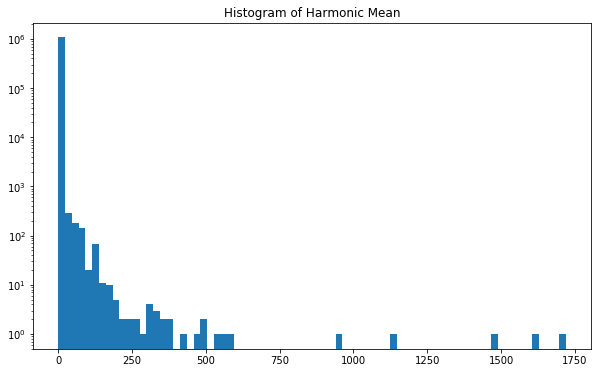

In [103]:
# #normal histogram of S1\2
plt.figure(figsize=(10,6))
plt.hist(hmean_score_S12, bins=75)  
# plt.plot(Scores_1)
# plt.hist(Scores_1, bins=15)  
titl_str = 'Histogram for Score 1 L-'+str(p)+' norm w/ PCA with '+str(n_pca_comp)+' PCs'
# plt.title(titl_str)
plt.title('Histogram of Harmonic Mean')
plt.yscale('log')
plt.savefig('Figs/8_Hist_Hmean.png',dpi = 200)
plt.show()

In [ ]:
colors = np.where(norm_S_df['Label'] > 0.5, 'r', 'b')
start_time = pd.datetime.now()
norm_S_df.plot.scatter(x="Norm S1",y="Norm S2", s=60, c=colors)
# plt.legend(['Inliers','Outliers'])
plt.title('Ouliers')

In [68]:
# extract the index of the entries with biggest score
outl_index = Scores_df.nlargest(n= no_max_outlier, columns='Score Mean').index

### 8. Detect the outliers & result interpretation

In [75]:
# outliers on the 45 variable dataset
# fraud_rec_45df = X_1st_norm_df.loc[outl_index]
fraud_rec_45df = X_1st_norm_df.loc[Hmean_ind]
fraud_rec_45df

,FULLVAL/LOTAREA_ZIP,FULLVAL/LOTAREA_ZIP3,FULLVAL/LOTAREA_TAXCLASS,FULLVAL/LOTAREA_B,FULLVAL/BLDAREA_ZIP,FULLVAL/BLDAREA_ZIP3,FULLVAL/BLDAREA_TAXCLASS,FULLVAL/BLDAREA_B,FULLVAL/BLDVOL_ZIP,FULLVAL/BLDVOL_ZIP3,...,AVTOT/BLDVOL_B,FULLVAL/LOTAREA_FULL,FULLVAL/BLDAREA_FULL,FULLVAL/BLDVOL_FULL,AVLAND/LOTAREA_FULL,AVLAND/BLDAREA_FULL,AVLAND/BLDVOL_FULL,AVTOT/LOTAREA_FULL,AVTOT/BLDAREA_FULL,AVTOT/BLDVOL_FULL
565391,400.712294,139.189591,282.511822,94.721585,452.136700,556.102023,234.440384,523.187893,518.460752,720.816758,...,652.407724,45.421471,521.929019,742.883122,882.925165,496.022684,738.187223,423.049997,267.179363,587.356641
632815,-0.020274,-0.081167,0.239653,-0.044777,355.487180,284.710000,838.546749,265.433785,474.426067,344.432395,...,284.214381,-0.019634,282.754528,402.477075,0.444901,268.741292,399.947411,0.159552,144.753925,318.226615
917941,1.573279,0.447074,0.450256,0.023212,99.853460,68.600347,28.916540,60.456971,54.632269,28.790054,...,598.996496,0.055437,64.407208,30.544230,20.864302,652.544581,323.701942,26.028483,915.263130,670.677199
1067359,644.121956,630.169433,648.924793,428.821018,-0.069954,-0.007708,-0.011592,-0.007251,-0.057958,-0.007490,...,-0.005466,110.973207,-0.010553,-0.004899,164.992572,-0.006831,-0.005824,137.674115,-0.006179,-0.005842
565397,5.503866,1.898945,3.879238,1.292278,241.460805,297.009330,125.205706,279.430178,276.894020,385.002751,...,348.477264,0.606945,278.758947,396.790349,12.613271,264.944394,394.296873,5.990717,142.708720,313.730605
585117,-0.189811,-0.087311,-0.154963,-0.064946,175.095711,255.422139,149.261373,311.954608,55.092686,25.649686,...,16.691301,-0.041905,332.309874,23.612017,0.012400,315.832468,23.493327,-0.047705,170.119652,18.690328
585438,0.264699,0.009469,0.018910,-0.039619,188.761777,275.351382,160.907756,336.293317,118.880760,55.349829,...,35.998190,-0.013940,358.236182,50.954353,0.031386,51.355067,7.635689,0.212550,183.390464,40.307580
248664,0.145267,-0.042419,-0.113330,-0.028813,280.219668,74.056763,20.552796,67.618850,101.185207,15.416213,...,11.830472,-0.035209,45.788466,10.835409,0.127395,40.348169,10.001754,0.014611,23.458907,8.588954
556608,102.587048,31.515977,63.987267,21.447320,4.661414,2.496672,1.037806,2.348907,7.191595,3.280387,...,2.997170,10.274561,2.345655,3.384031,198.887651,2.259112,3.369047,95.960852,1.221983,2.697785
750815,221.698916,19.111395,355.845855,23.384149,-0.050808,-0.037644,-0.022942,-0.035659,-0.069687,-0.035213,...,-0.009728,25.849842,-0.031318,-0.032078,26.553277,-0.008994,-0.008085,12.670861,-0.008792,-0.009232


In [163]:
pd.DataFrame(data_45.std()).transpose()

,FULLVAL/LOTAREA_ZIP,FULLVAL/LOTAREA_ZIP3,FULLVAL/LOTAREA_TAXCLASS,FULLVAL/LOTAREA_B,FULLVAL/BLDAREA_ZIP,FULLVAL/BLDAREA_ZIP3,FULLVAL/BLDAREA_TAXCLASS,FULLVAL/BLDAREA_B,FULLVAL/BLDVOL_ZIP,FULLVAL/BLDVOL_ZIP3,...,AVTOT/BLDVOL_B,FULLVAL/LOTAREA_FULL,FULLVAL/BLDAREA_FULL,FULLVAL/BLDVOL_FULL,AVLAND/LOTAREA_FULL,AVLAND/BLDAREA_FULL,AVLAND/BLDVOL_FULL,AVTOT/LOTAREA_FULL,AVTOT/BLDAREA_FULL,AVTOT/BLDVOL_FULL
0,3.970634,9.948176,5.596112,14.619238,9.938859,14.949388,23.253446,15.891433,11.507682,23.647048,...,99.636039,21.871311,16.566027,24.785613,16.199752,95.648917,117.370238,12.015154,104.399168,104.402183


#### Final outlier records:

In [76]:
# outliers on the original dataset (transpose for readibility)
fraud_rec_df = or_mydata.loc[Hmean_ind]
fraud_rec_df.transpose()

,565391,632815,917941,1067359,565397,585117,585438,248664,556608,750815
Unnamed: 0,565391,632815,917941,1067359,565397,585117,585438,248664,556608,750815
RECORD,565392,632816,917942,1067360,565398,585118,585439,248665,556609,750816
BBLE,3085900700,4018420001,4142600001,5078530085,3085910100,4004200001,4004590005,2056500001,3083120001,4066610005E
B,3,4,4,5,3,4,4,2,3,4
BLOCK,8590,1842,14260,7853,8591,420,459,5650,8312,6661
LOT,700,1,1,85,100,1,5,1,1,5
EASEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E
OWNER,U S GOVERNMENT OWNRD,"864163 REALTY, LLC","LOGAN PROPERTY, INC.",NaN,DEPT OF GENERAL SERVI,NEW YORK CITY ECONOMI,11-01 43RD AVENUE REA,PARKS AND RECREATION,PARKS AND RECREATION,M FLAUM
BLDGCL,V9,D9,T1,B2,V9,O3,H9,Q1,Q1,V0
TAXCLASS,4,2,4,1,4,4,4,4,4,1B


In [81]:
# scatter plot the outliers
no_max_outlier = 10
Scores_df['Label_Hm'] = np.zeros(norm_S_df.shape[0], dtype=int)
# outl_nomr_index = norm_S_df.nlargest(n= no_max_outlier, columns='Norm S1').index
Scores_df['Label_Hm'].loc[Hmean_ind] = 1
Scores_df 

,Score 1,Score 2,Score Mean,Score Harm. Mean,Label_Hm
0,1.943136,2.223851,2.083494,2.077180,0
1,27.296348,66.760675,47.028512,41.164962,0
2,0.247036,0.249262,0.248149,0.248146,0
3,0.185182,0.349862,0.267522,0.250075,0
4,26.047596,48.389204,37.218400,34.913984,0
...,...,...,...,...,...
1070989,0.148688,0.322358,0.235523,0.213167,0
1070990,0.178416,0.386676,0.282546,0.255748,0
1070991,0.174461,0.376243,0.275352,0.249552,0
1070992,0.153098,0.308313,0.230705,0.212619,0


duration:  0:00:53.844018


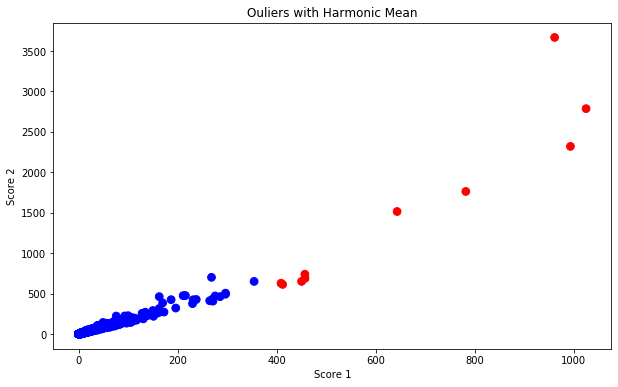

In [84]:
colors = np.where(Scores_df['Label_Hm'] > 0.5, 'r', 'b')
start_time = pd.datetime.now()
Scores_df.plot.scatter(x="Score 1",y="Score 2", s=60, c=colors,figsize=(10,6))
# plt.legend(['Inliers','Outliers'])
plt.title('Ouliers with Harmonic Mean')
plt.savefig('Figs/6_Scatter_w_Hmean.png',dpi = 200)
print('duration: ', pd.datetime.now() - start_time)